In [1]:
import json
import os
from pathlib import Path
import random
import imageio
from keras.models import load_model
from utils.utils import get_yolo_boxes, makedirs
from utils.bbox import draw_boxes
import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
base_path = Path('/mnt/ssd0_1/kashin/gr_mri_spine')
test_imgs_path = base_path / 'test_imgs'

data = preprocessing.load_data()
data = preprocessing.select_using_data(data)
using_labels, indx2labels, labels2indx, indx2color =\
    preprocessing.create_label_indx_mappings(data)

shejnyj-mezhpozvonochnyj-disk-zdorovyj                       961
grudnoj-mezhpozvonochnyj-disk-zdorovyj                       912
shejnyj-mezhpozvonochnyj-disk-patologicheskij                403
shejnyj-mezhpozvonochnyj-disk-s-podozreniem-na-patologiyu    338
grudnoj-mezhpozvonochnyj-disk-s-podozreniem-na-patalogiyu     52
grudnoj-mezhpozvonochnyj-disk-patologicheskij                 26
hernia                                                         1
protrusion                                                     1
dtype: int64

Using labels: ['shejnyj-mezhpozvonochnyj-disk-zdorovyj', 'grudnoj-mezhpozvonochnyj-disk-zdorovyj', 'shejnyj-mezhpozvonochnyj-disk-patologicheskij', 'shejnyj-mezhpozvonochnyj-disk-s-podozreniem-na-patologiyu', 'grudnoj-mezhpozvonochnyj-disk-s-podozreniem-na-patalogiyu', 'grudnoj-mezhpozvonochnyj-disk-patologicheskij']


In [23]:
with open('config.json') as f:
    config = json.load(f)
    
net_h, net_w = 384, 384
obj_thresh, nms_thresh = 0.4, 0.45

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [4]:
test_imgs = [imageio.imread(p) for p in test_imgs_path.iterdir()]
model = load_model(config['train']['saved_weights_name'])

/home/EvgenyKashin/.conda/envs/py36/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Predict on random sample

In [7]:
indx2labels

{0: 'shejnyj-mezhpozvonochnyj-disk-zdorovyj',
 1: 'grudnoj-mezhpozvonochnyj-disk-zdorovyj',
 2: 'shejnyj-mezhpozvonochnyj-disk-patologicheskij',
 3: 'shejnyj-mezhpozvonochnyj-disk-s-podozreniem-na-patologiyu',
 4: 'grudnoj-mezhpozvonochnyj-disk-s-podozreniem-na-patalogiyu',
 5: 'grudnoj-mezhpozvonochnyj-disk-patologicheskij'}

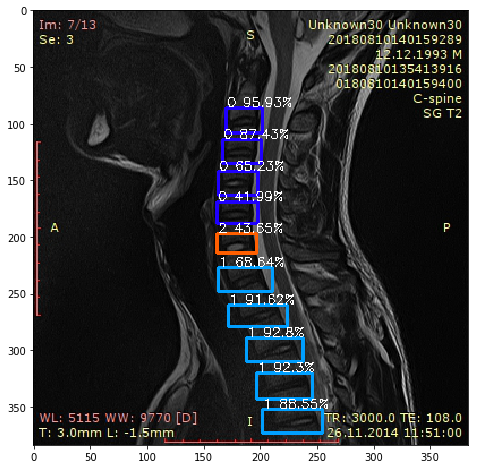

In [40]:
img = random.choice(test_imgs)
plt.figure(figsize=(8, 8))
img = img.copy()
boxes = get_yolo_boxes(model, [img], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
draw_boxes(img, boxes, config['model']['labels'], obj_thresh) 
plt.imshow(img)

## Saving prediciton

In [42]:
prediction_fodler = base_path / 'prediciton'
prediction_fodler.mkdir(exist_ok=True)

In [46]:
for img, path in zip(test_imgs, test_imgs_path.iterdir()):
    boxes = get_yolo_boxes(model, [img], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
    draw_boxes(img, boxes, config['model']['labels'], obj_thresh) 
    imageio.imsave(prediction_fodler / path.name, img)